In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

In [24]:
videos = pd.read_csv("youtube data/USvideos.csv")
videos['category_id'] = pd.to_numeric(videos['category_id'])
videos['views'] = pd.to_numeric(videos['views'])
videos['tags'] = videos['tags'].str.split('|')
videos['like_dislike_ratio'] = videos['likes']/videos['dislikes']
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_dislike_ratio
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,[SHANtell martin],748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,19.395482
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"[last week tonight trump presidency, ""last wee...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",15.812724
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,27.352126
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"[rhett and link, ""gmm"", ""good mythical morning...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,15.273273
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,66.483157


In [30]:
# videos.to_csv('youtube data/US_videos.csv')
# category.to_csv('youtube data/US_videos_category.csv')
videos['publish_time'] = pd.to_datetime(videos['publish_time'])
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [31]:
category = pd.read_json("youtube data/US_category_id.json")
category = pd.json_normalize(category['items'])

In [32]:
category['id'] = pd.to_numeric(category['id'])
videos = videos.merge(category,how='inner',left_on='category_id', right_on='id')

In [33]:
videos.shape

(40949, 23)

In [34]:
videos.dropna()
videos.to_csv('youtube data/US_videos_complete.csv')
videos.shape

(40949, 23)

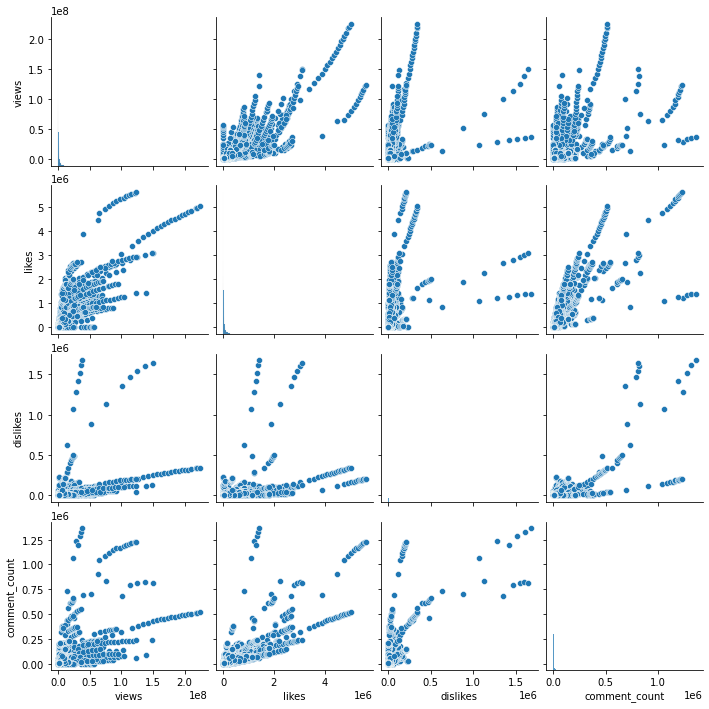

In [10]:
# Find relationships among numeric varaibles and potentially linear relationships between likes and dislikes
# Multiple linear lines in one pairplot suggests that there might exist linear relationships between 
# views, likes, dislikes, and # of comments but these relationship might be different within each video category or
# are dominated by video content 
sns.pairplot(videos,vars=videos.columns[7:11])

In [40]:
videos.sort_values(by=['likes'], ascending=False).head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,id_x,snippet.channelId_x,snippet.title_x,snippet.assignable_x,kind_y,etag_y,id_y,snippet.channelId_y,snippet.title_y,snippet.assignable_y
31839,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31796,7C2z4GqqS5E,18.31.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",121219886,5595203,205565,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31754,7C2z4GqqS5E,18.30.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",115664850,5530568,200995,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31709,7C2z4GqqS5E,18.29.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",111882133,5486349,197638,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31669,7C2z4GqqS5E,18.28.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",107756615,5439015,194172,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31631,7C2z4GqqS5E,18.27.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",103786733,5386959,190567,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31589,7C2z4GqqS5E,18.26.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",98637739,5321402,186331,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31543,7C2z4GqqS5E,18.25.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",92054928,5232318,179451,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31502,7C2z4GqqS5E,18.24.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150831,172570,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31460,7C2z4GqqS5E,18.23.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",80738011,5053329,165853,...,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True


In [27]:
videos.sort_values(by=['views'],ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
31902,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,...,False,False,False,“This is America” by Childish Gambino http://s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31856,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,...,False,False,False,“This is America” by Childish Gambino http://s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31813,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,...,False,False,False,“This is America” by Childish Gambino http://s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31770,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,...,False,False,False,“This is America” by Childish Gambino http://s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
31725,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,...,False,False,False,“This is America” by Childish Gambino http://s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True


In [22]:
videos.groupby('snippet.title')['views'].mean().sort_values(ascending=False).head()

snippet.title
Music                    6.201003e+06
Film & Animation         3.106250e+06
Nonprofits & Activism    2.963884e+06
Gaming                   2.620831e+06
Entertainment            2.067883e+06
Name: views, dtype: float64